<a href="https://colab.research.google.com/github/FUkrell/TrabajoEspecialista/blob/main/Trabajo_Final_Especialista_Federico_Krell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga del dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Provide the file path of the CSV file in your Google Drive
csv_file_path = '/content/drive/My Drive/engine_anon2.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# You can now use the 'df' DataFrame to manipulate and analyze the data

In [3]:
 import seaborn as sns
 from sklearn.metrics import confusion_matrix

alpha is set to 2 to represent a 2:1 relationship between the importance of identifying engines in bad shape and engines in good shape. The values of tn_value and fp_value are then calculated based on alpha, tp_value, and fn_value.

In [4]:
def custom_scoring_function(y_true, y_pred):
    # Calculate the TP, TN, FP, FN values from the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Set the value for alpha
    alpha = 2

    # Set the values for tp_value and fn_value
    tp_value = 1
    fn_value = 1

    # Calculate the values for tn_value and fp_value based on alpha
    tn_value = alpha * tp_value
    fp_value = alpha * fn_value

    # Calculate the utility based on TP, TN, FP, FN values
    utility = tp * tp_value + tn * tn_value - fp * fp_value - fn * fn_value

    return utility




#Exploración inicial

In [5]:
df.head()

,orderid,unitno,modelid,evalcode,asample,prev,preva,oilchangelast,oilhours,PQI,...,Na,K,Mo,B,Fe,ST,V40,OXI,NIT,SUL
0,1,P,HME Model 1 type 3,A,1,2,0,1,252,0,...,10,9,1,1,15,20,105.2,12,6,19
1,2,P,HME Model 1 type 3,B,0,2,0,1,264,0,...,11,12,1,1,14,19,105.5,12,6,20
2,3,P,HME Model 1 type 3,B,0,2,0,1,264,0,...,11,15,2,0,14,17,105.3,13,6,20
3,4,P,HME Model 1 type 3,B,0,2,0,1,262,0,...,33,83,9,3,15,14,102.2,12,5,18
4,5,P,HME Model 1 type 3,B,0,2,0,0,520,1,...,24,55,5,2,17,25,113.6,14,7,21


In [6]:
unique_values = df['unitno'].unique()
print(f'Los valores únicos en la columna unitno son: {unique_values}')

Los valores únicos en la columna unitno son: ['P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'E' 'F' 'G' 'H' 'J' 'K' 'L'
 'M' 'MM' 'PP' 'QQ' 'RR' 'SS' 'TT' 'VV' 'WW' 'XX' 'YY' 'ZZ' 'EE' 'FF' 'GG'
 'HH' 'JJ' 'KK' 'LL' 'DD' 'CC']


In [7]:
unique_values = df['modelid'].unique()
print(f'Los valores únicos en la columna unitno son: {unique_values}')

Los valores únicos en la columna unitno son: ['HME Model 1 type 3' 'HME Model 1 type 1' 'HME Model 1 type 2']


In [8]:
value_counts = df['asample'].value_counts()
print(f'Hay {value_counts[1]} unos y {value_counts[0]} ceros en la columna asample.')

Hay 211 unos y 1121 ceros en la columna asample.


In [9]:
value_counts = df['evalcode'].value_counts()
print('Recuento de valores en la columna evalcode:')
print(value_counts)

Recuento de valores en la columna evalcode:
B    611
C    429
A    211
X     81
Name: evalcode, dtype: int64


In [10]:
value_counts = df['prev'].value_counts()
print('Recuento de valores en la columna evalcode:')
print(value_counts)

Recuento de valores en la columna evalcode:
2    628
3    423
1    205
4     76
Name: prev, dtype: int64


In [11]:
df['prevb'] = (df['prev'] == 2).astype(int)
df['prevc'] = (df['prev'] == 3).astype(int)
df['prevx'] = (df['prev'] == 4).astype(int)

In [12]:
value_counts = df['prevc'].value_counts()
print('Recuento de valores en la columna evalcode:')
print(value_counts)

Recuento de valores en la columna evalcode:
0    909
1    423
Name: prevc, dtype: int64


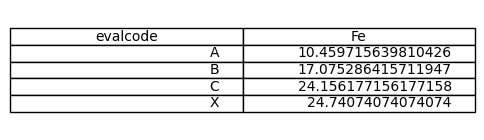

In [13]:

import matplotlib.pyplot as plt
grouped_means = df.groupby('evalcode')['Fe'].mean()

# Convierte la serie en un DataFrame y agrega una columna con los nombres de las filas
table_df = pd.DataFrame(grouped_means).reset_index()

fig, ax = plt.subplots(figsize=(6, 6))
# Ajusta los márgenes de la figura
fig.subplots_adjust(top=0.6, bottom=0.4)

# Oculta los ejes
ax.axis('tight')
ax.axis('off')

# Crea la tabla y agrega a la figura
ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center')

# Muestra la figura
plt.show()

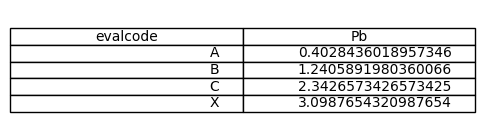

In [14]:
grouped_means = df.groupby('evalcode')['Pb'].mean()

# Convierte la serie en un DataFrame y agrega una columna con los nombres de las filas
table_df = pd.DataFrame(grouped_means).reset_index()

fig, ax = plt.subplots(figsize=(6, 6))
# Ajusta los márgenes de la figura
fig.subplots_adjust(top=0.6, bottom=0.4)

# Oculta los ejes
ax.axis('tight')
ax.axis('off')

# Crea la tabla y agrega a la figura
ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center')

# Muestra la figura
plt.show()

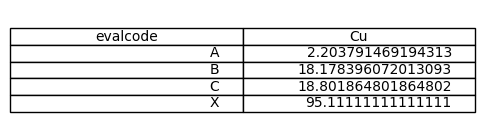

In [15]:
grouped_means = df.groupby('evalcode')['Cu'].mean()

# Convierte la serie en un DataFrame y agrega una columna con los nombres de las filas
table_df = pd.DataFrame(grouped_means).reset_index()

fig, ax = plt.subplots(figsize=(6, 6))
# Ajusta los márgenes de la figura
fig.subplots_adjust(top=0.6, bottom=0.4)

# Oculta los ejes
ax.axis('tight')
ax.axis('off')

# Crea la tabla y agrega a la figura
ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center')

# Muestra la figura
plt.show()

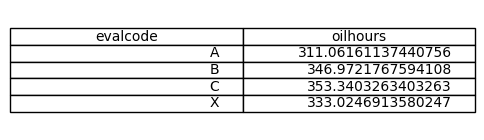

In [16]:
grouped_means = df.groupby('evalcode')['oilhours'].mean()

# Convierte la serie en un DataFrame y agrega una columna con los nombres de las filas
table_df = pd.DataFrame(grouped_means).reset_index()

fig, ax = plt.subplots(figsize=(6, 6))
# Ajusta los márgenes de la figura
fig.subplots_adjust(top=0.6, bottom=0.4)

# Oculta los ejes
ax.axis('tight')
ax.axis('off')

# Crea la tabla y agrega a la figura
ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center')

# Muestra la figura
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   orderid        1332 non-null   int64  
 1   unitno         1332 non-null   object 
 2   modelid        1332 non-null   object 
 3   evalcode       1332 non-null   object 
 4   asample        1332 non-null   int64  
 5   prev           1332 non-null   int64  
 6   preva          1332 non-null   int64  
 7   oilchangelast  1332 non-null   int64  
 8   oilhours       1332 non-null   int64  
 9   PQI            1332 non-null   int64  
 10  Pb             1332 non-null   int64  
 11  Al             1332 non-null   int64  
 12  P              1332 non-null   int64  
 13  Ca             1332 non-null   int64  
 14  Zn             1332 non-null   int64  
 15  Cu             1332 non-null   int64  
 16  Si             1332 non-null   int64  
 17  Na             1332 non-null   int64  
 18  K       

In [18]:
df.describe()

,orderid,asample,prev,preva,oilchangelast,oilhours,PQI,Pb,Al,P,...,B,Fe,ST,V40,OXI,NIT,SUL,prevb,prevc,prevx
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,...,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,966.046547,0.158408,2.277778,0.153904,0.596096,342.486486,1.300300,1.575826,1.656907,927.120871,...,2.041291,18.774024,16.054054,111.909835,14.685435,7.268769,21.399399,0.471471,0.317568,0.057057
std,511.663922,0.365261,0.789308,0.360992,0.490863,128.821727,4.773446,2.207382,0.999702,67.035989,...,2.798348,8.916887,9.355252,6.684890,2.658527,1.400274,2.245878,0.499373,0.465705,0.232039
min,1.000000,0.000000,1.000000,0.000000,0.000000,105.000000,0.000000,0.000000,0.000000,559.000000,...,0.000000,2.000000,0.000000,41.300000,9.000000,3.000000,14.000000,0.000000,0.000000,0.000000
25%,652.750000,0.000000,2.000000,0.000000,0.000000,238.000000,0.000000,0.000000,1.000000,889.000000,...,0.000000,12.000000,9.000000,108.275000,13.000000,6.000000,20.000000,0.000000,0.000000,0.000000
50%,1017.500000,0.000000,2.000000,0.000000,1.000000,278.500000,0.000000,1.000000,2.000000,929.000000,...,1.000000,17.000000,15.000000,111.650000,14.000000,7.000000,21.000000,0.000000,0.000000,0.000000
75%,1383.250000,0.000000,3.000000,0.000000,1.000000,478.000000,1.000000,2.000000,2.000000,964.000000,...,3.000000,24.000000,21.000000,115.800000,16.000000,8.000000,23.000000,1.000000,1.000000,0.000000
max,1789.000000,1.000000,4.000000,1.000000,1.000000,600.000000,101.000000,24.000000,15.000000,1342.000000,...,43.000000,61.000000,72.000000,138.000000,33.000000,12.000000,30.000000,1.000000,1.000000,1.000000


In [19]:
df.shape

(1332, 30)

No hay NAs, no hace falta filtrar columnas o filas. 
La columna Asample es nuestro target binario. Evalcode no deberia ser usada

In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set the color palette to "colorblind"
# color_palette = "colorblind"

# # Use pairplot() to create scatterplots for all combinations of variables, with histograms and density plots on the diagonal
# sns.pairplot(df, diag_kind="kde", diag_kws={'color': 'black'}, plot_kws={'alpha': 0.3, 'edgecolor': 'k', 's': 30, 'palette': color_palette})

# # Customize other settings as needed
# plt.suptitle("Pairplot of Variables", y=1.02)
# plt.show()

<ipython-input-21-3c50d2b7fa04>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


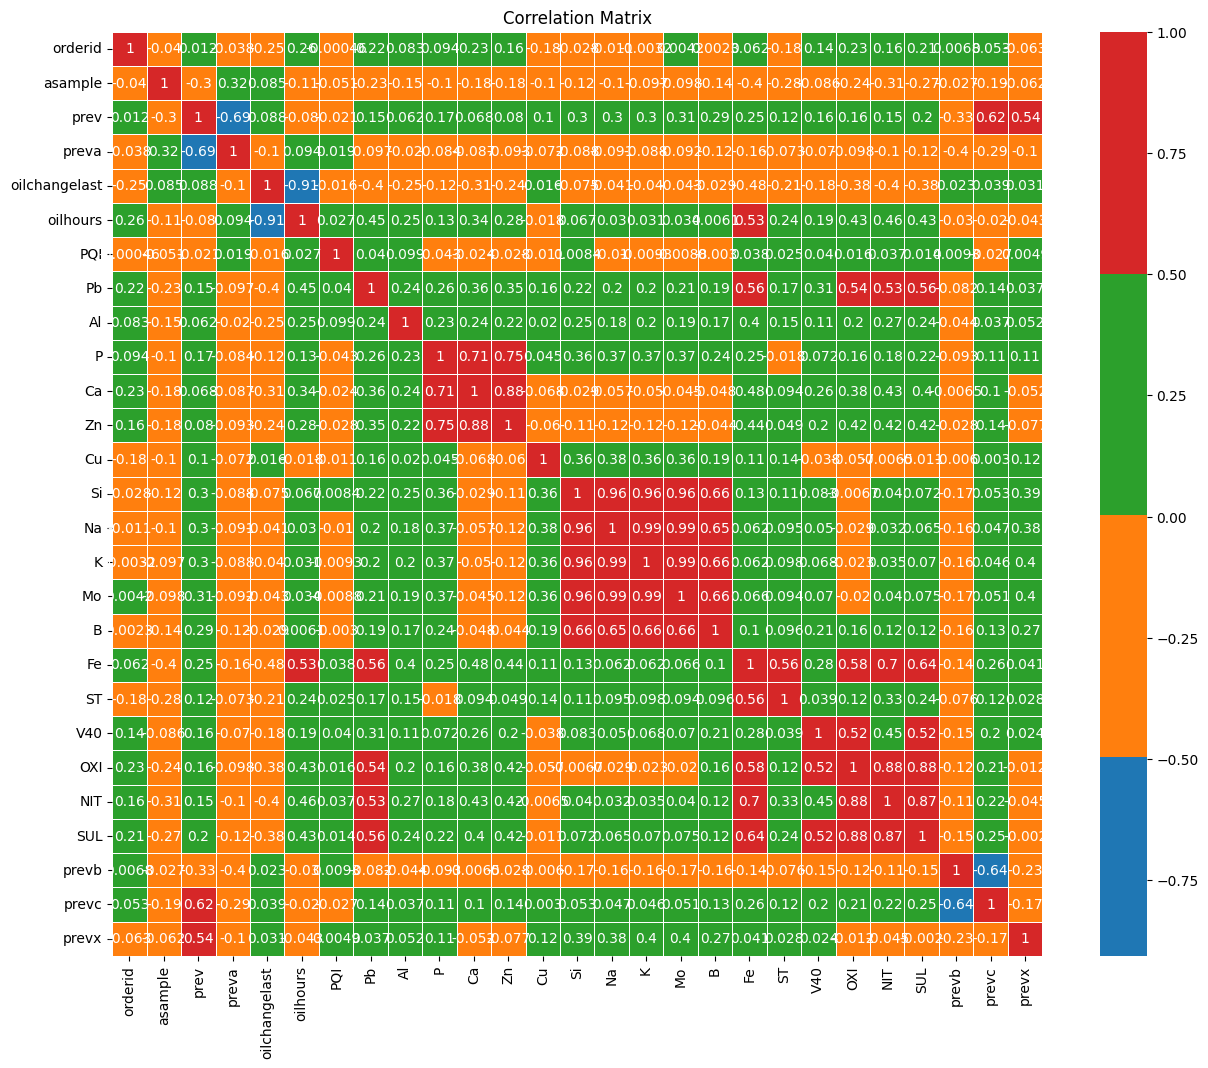

In [21]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 8*1.5))
# Define a custom color palette for colorblind-friendly colors
color_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette(color_palette), center=0, linewidths=0.5, cbar=True)

# Customize other settings as needed
plt.title("Correlation Matrix")
plt.show()

#Regresión lineal

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from hyperopt import fmin, tpe, hp
from hyperopt.pyll.base import scope

In [23]:
# Load the dataset
# Assume 'X' contains the features and 'y' contains the target variable in your dataset 'df'
X = df.iloc[:, 5:]
X = X.drop('prev', axis=1)
y = df['asample']

In [24]:

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Convert predicted probabilities to binary classes based on a threshold
threshold = 0.5
y_pred_binary = np.where(y_pred_linear > threshold, 1, 0)

# Calculate and print the mean squared error
mse_linear = mean_squared_error(y_test, y_pred_binary)
print("Linear Regression Mean Squared Error:", mse_linear)

Linear Regression Mean Squared Error: 0.13857677902621723


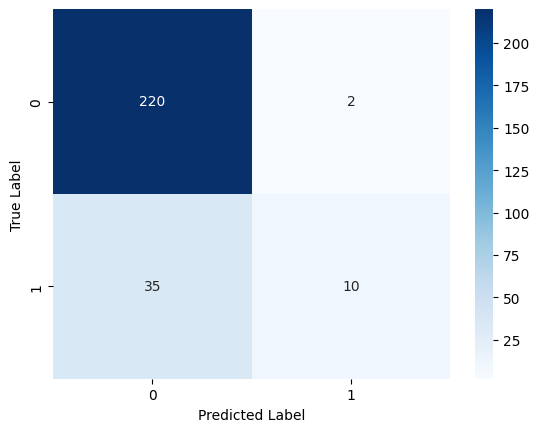

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to binary classes based on a threshold
threshold = 0.5
y_pred_binary = np.where(y_pred_linear > threshold, 1, 0)

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

In [27]:
tn

220

In [28]:
fp

2

In [29]:
fn

35

In [30]:
tp

10

In [31]:
cm

array([[220,   2],
       [ 35,  10]])

In [32]:
220*2-2*2-35+10

411

In [33]:

# Calculate the custom score for the linear regression model
custom_score = custom_scoring_function(y_test, y_pred_binary)
custom_score

411

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate and print the R-squared score
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression R-squared Score:", r2_linear)



Linear Regression R-squared Score: 0.18741635154339842


In [35]:
import statsmodels.api as sm

In [36]:
# Calculate residuals
residuals = y_test - y_pred_linear
# Add constant to X_test for statsmodels
X_test_sm = sm.add_constant(X_test)

# Fit OLS model
ols_model = sm.OLS(y_test, X_test_sm)
ols_results = ols_model.fit()

# Get p-values and sort in ascending order
p_values = ols_results.pvalues
p_values_sorted = p_values.sort_values()

# Print p-values in ascending order
print("P-values (sorted):")
print(p_values_sorted)



P-values (sorted):
Na               0.001301
Mo               0.022516
ST               0.047181
P                0.077882
V40              0.123501
Fe               0.123605
PQI              0.159647
K                0.160916
oilhours         0.179971
Pb               0.295813
Zn               0.307022
Ca               0.338734
preva            0.354646
NIT              0.596806
OXI              0.619986
Si               0.645110
prevx            0.672949
SUL              0.707100
oilchangelast    0.738264
Al               0.778030
prevc            0.871208
B                0.906309
const            0.938906
Cu               0.944313
prevb            0.973519
dtype: float64


In [45]:
# Your code
residuals = y_test - y_pred_linear
X_test_sm = sm.add_constant(X_test)
ols_model = sm.OLS(y_test, X_test_sm)
ols_results = ols_model.fit()
p_values = ols_results.pvalues
p_values_sorted = p_values.sort_values()

# Create DataFrame from p_values_sorted
dfpval = pd.DataFrame(p_values_sorted, columns=['p-values'])

# Style DataFrame
styled_df = dfpval.style.background_gradient(cmap='coolwarm').set_properties(**{'color': 'black', 'border-color': 'white'})

# Display styled DataFrame
styled_df

,p-values
Na,0.001301
Mo,0.022516
ST,0.047181
P,0.077882
V40,0.123501
Fe,0.123605
PQI,0.159647
K,0.160916
oilhours,0.179971
Pb,0.295813


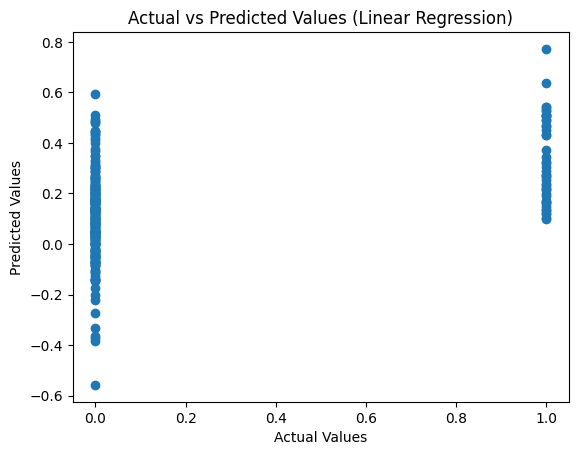

In [ ]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()

In [ ]:
# Access the coefficients of the linear regression model
coefficients = linear_model.coef_

# Get the names of the independent variables
variable_names = X.columns

# Create a dictionary mapping variable names to their coefficients
variable_coefficients = dict(zip(variable_names, coefficients))

# Sort the dictionary by the absolute values of the coefficients
sorted_variable_coefficients = dict(sorted(variable_coefficients.items(), key=lambda item: abs(item[1]), reverse=True))

# Print the sorted variable names and their corresponding coefficients
for variable, coefficient in sorted_variable_coefficients.items():
    print(f"{variable}: {coefficient}")

preva: 0.19792999547837717
prevc: -0.07291647852087713
prevx: -0.07159135516082375
prevb: -0.05342216179667721
NIT: -0.025349165628364152
oilchangelast: -0.024341186055785627
B: -0.01559230620818728
Fe: -0.012938602332259429
OXI: 0.008309955673809105
SUL: -0.007390996510825425
V40: 0.004504714986878827
Mo: 0.0033593507138867384
Pb: 0.0032367329605888875
PQI: -0.0028052805840341347
Si: -0.002510385110065832
Na: -0.0022253059907191026
ST: -0.0010370846133789368
P: 0.0009255476466188428
K: 0.0004950954024114156
Zn: -0.00039033050871560375
Ca: -0.00019481487822141705
oilhours: 0.00019009859168600229
Al: 4.939760108607384e-05
Cu: -4.9366577550676515e-05


#Elastic net And scoring

Elastic Net Regression with alpha=0.1 and l1_ratio=0.1


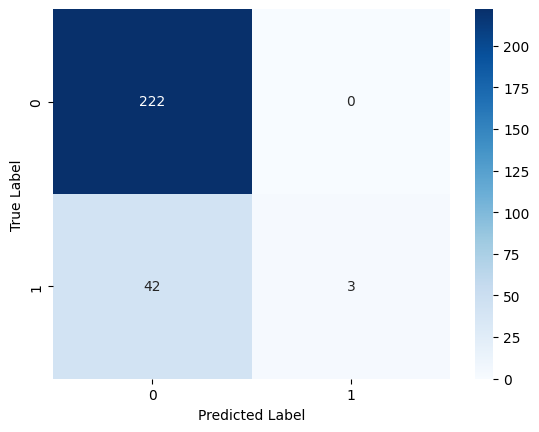

Custom Score: 405
Elastic Net Regression with alpha=0.1 and l1_ratio=0.3


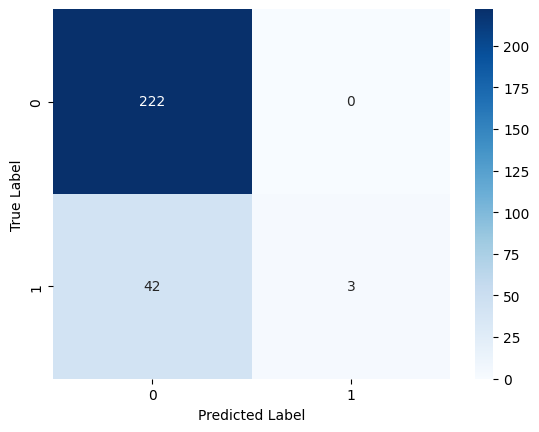

Custom Score: 405
Elastic Net Regression with alpha=0.1 and l1_ratio=0.5


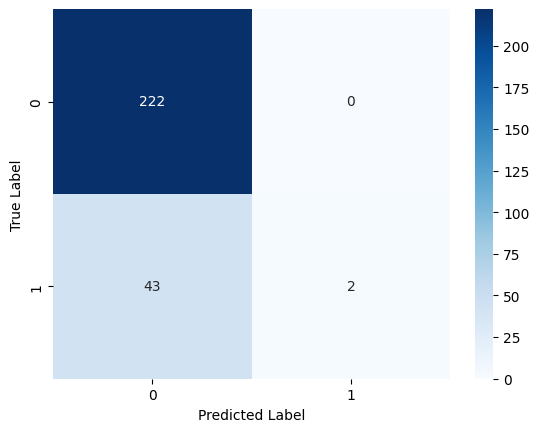

Custom Score: 403
Elastic Net Regression with alpha=0.5 and l1_ratio=0.1


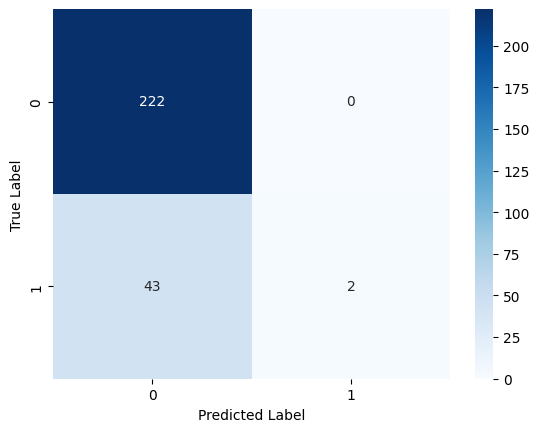

Custom Score: 403
Elastic Net Regression with alpha=0.5 and l1_ratio=0.3


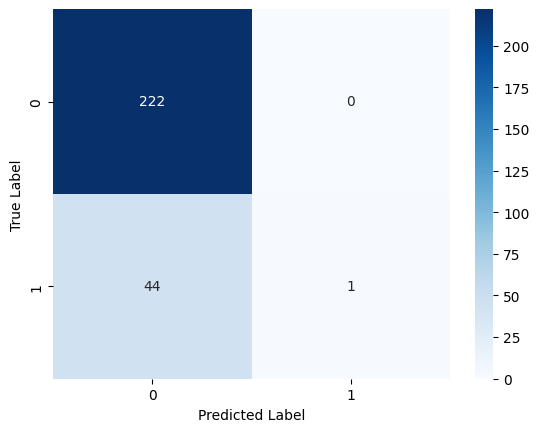

Custom Score: 401
Elastic Net Regression with alpha=0.5 and l1_ratio=0.5


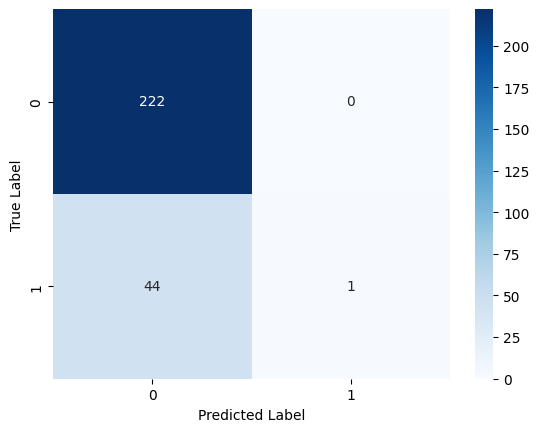

Custom Score: 401
Elastic Net Regression with alpha=1.0 and l1_ratio=0.1


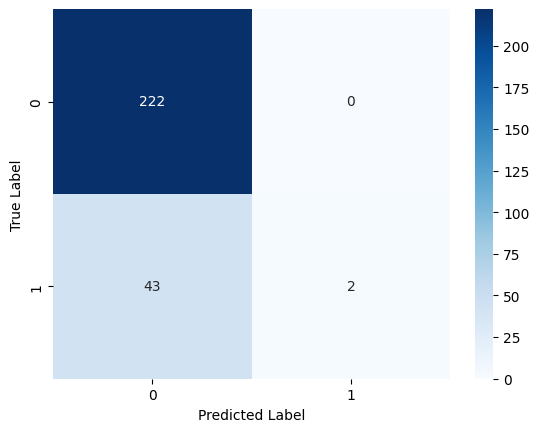

Custom Score: 403
Elastic Net Regression with alpha=1.0 and l1_ratio=0.3


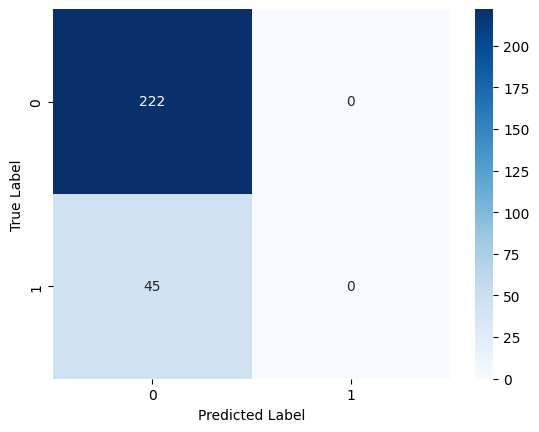

Custom Score: 399
Elastic Net Regression with alpha=1.0 and l1_ratio=0.5


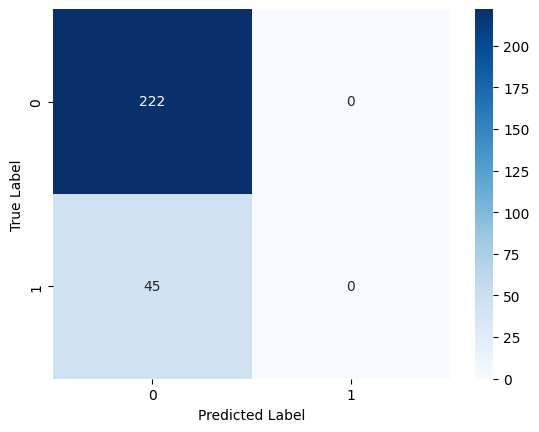

Custom Score: 399


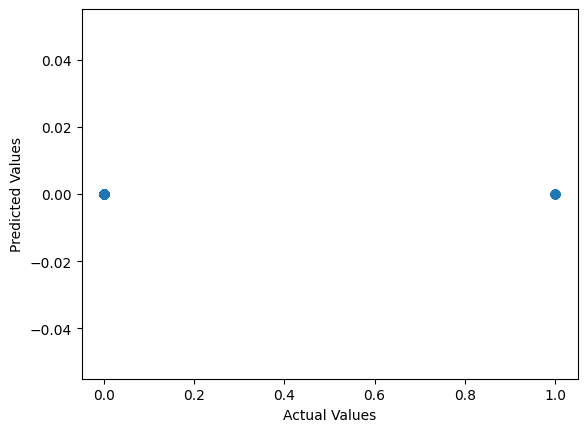

In [ ]:
# Load the dataset
# Assume 'X' contains the features and 'y' contains the binary target variable in your dataset 'df'
X = df.iloc[:, 5:]
X = X.drop('prev', axis=1)
y = df['asample']


# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define alpha and l1_ratio values
alphas = [0.1, 0.5, 1.0]
l1_ratios = [0.1, 0.3, 0.5]

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Create and fit the Elastic Net regression model
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic_net_model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred_elastic_net = elastic_net_model.predict(X_val)

        # Convert predicted values to binary classes based on a threshold value
        threshold = 0.5
        y_pred_binary = np.where(y_pred_elastic_net > threshold, 1, 0)

        # Calculate and print the confusion matrix
        cm = confusion_matrix(y_val, y_pred_binary)
        print(f"Elastic Net Regression with alpha={alpha} and l1_ratio={l1_ratio}")
        # Create a heatmap
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Calculate and print the custom score
        custom_score = custom_scoring_function(y_val, y_pred_binary)
        print(f"Custom Score: {custom_score}")

        # Plot the actual vs predicted values
        plt.scatter(y_val, y_pred_binary)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")

In [ ]:
# Create and fit the Elastic Net regression model
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.3)
elastic_net_model.fit(X_train, y_train)

# Get the feature names and coefficients
feature_names = X_train.columns
coefficients = elastic_net_model.coef_

# Create a list of tuples containing the feature names and coefficients
feature_importances = list(zip(feature_names, coefficients))

# Sort the list by the magnitude of the coefficients
feature_importances.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the sorted feature importances
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

Fe: -0.015106195053026397
P: 0.0008870702857194366
ST: -0.0007443056389728803
Zn: -0.0005715409215560609
K: -0.00047394269750372127
oilhours: 0.00037834140814695403
Ca: -0.00016185137517264774
Cu: -0.00010747325388933804
preva: 0.0
oilchangelast: -0.0
PQI: -0.0
Pb: -0.0
Al: -0.0
Si: -0.0
Na: -0.0
Mo: -0.0
B: -0.0
V40: 0.0
OXI: -0.0
NIT: -0.0
SUL: -0.0
prevb: -0.0
prevc: -0.0
prevx: -0.0


#Logistic regression

/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2455441513829613
            Iterations: 55
            Function evaluations: 78
            Gradient evaluations: 55
Logistic Regression with alpha=10.0
Custom Score: 403


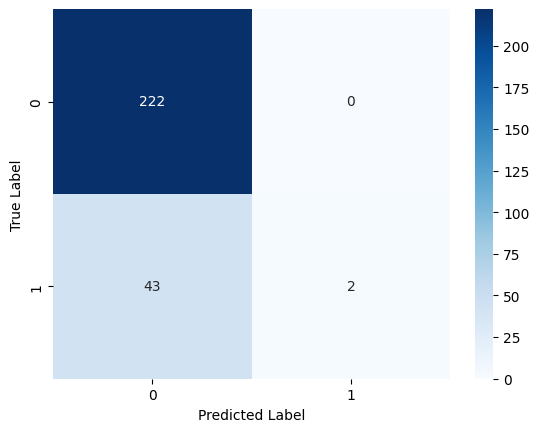

/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24368165822569285
            Iterations: 60
            Function evaluations: 82
            Gradient evaluations: 60
Logistic Regression with alpha=9
Custom Score: 389


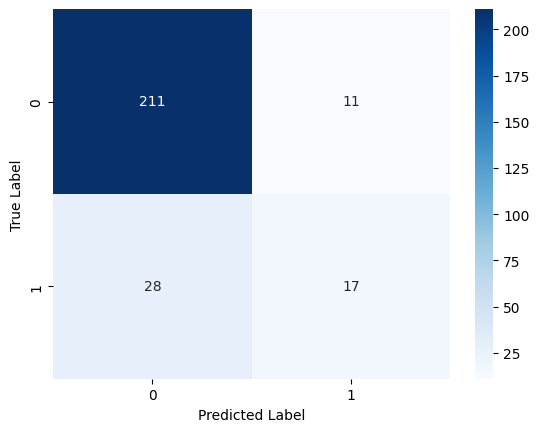

/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2417208066492263
            Iterations: 70
            Function evaluations: 92
            Gradient evaluations: 70
Logistic Regression with alpha=8
Custom Score: 391


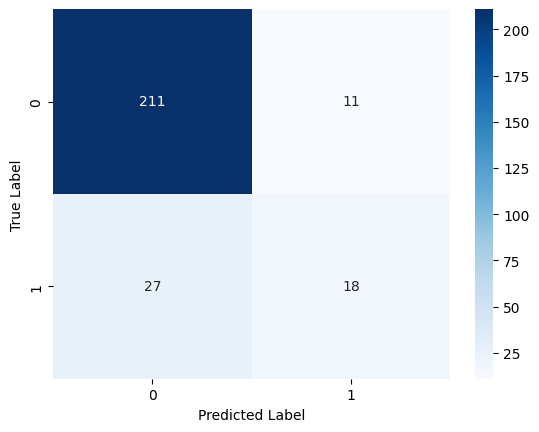

/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2350012605614793
            Iterations: 90
            Function evaluations: 113
            Gradient evaluations: 90
Logistic Regression with alpha=5
Custom Score: 403


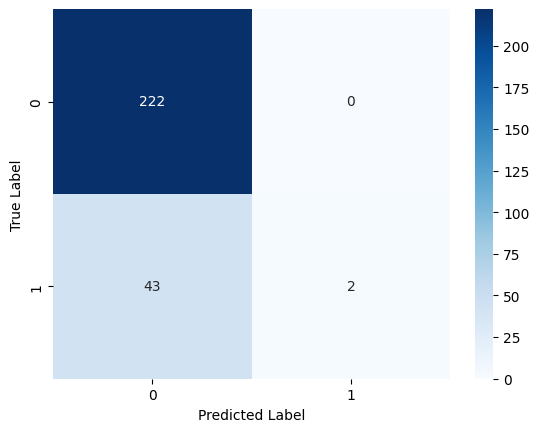

/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.23226771549796765
            Iterations: 87
            Function evaluations: 110
            Gradient evaluations: 87
Logistic Regression with alpha=4
Custom Score: 399


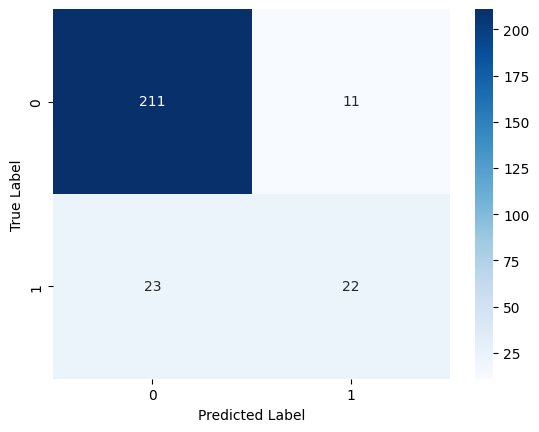

/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2258832916365929
            Iterations: 101
            Function evaluations: 124
            Gradient evaluations: 101
Logistic Regression with alpha=2.0
Custom Score: 399


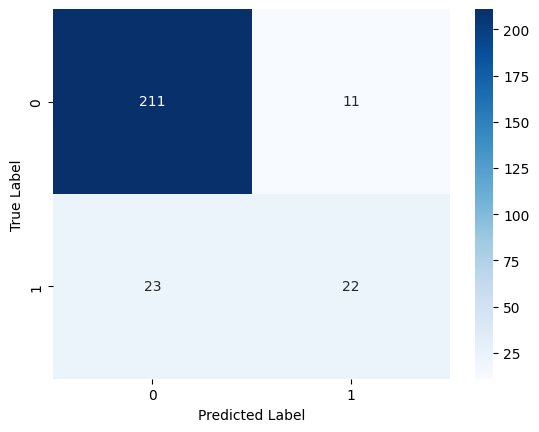

/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.22219914343342081
            Iterations: 107
            Function evaluations: 130
            Gradient evaluations: 107
Logistic Regression with alpha=1.0
Custom Score: 401


/usr/local/lib/python3.9/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 25 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


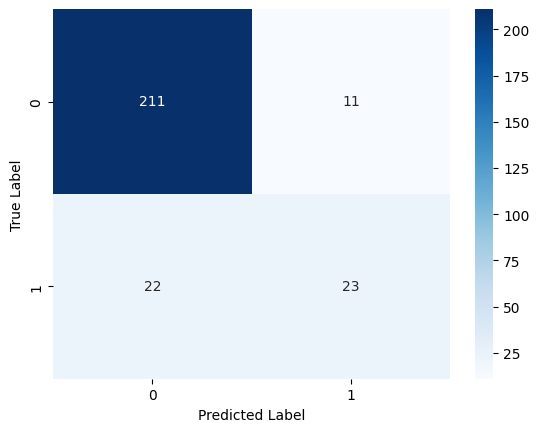

Best Model:
                           Logit Regression Results                           
Dep. Variable:                asample   No. Observations:                 1065
Model:                          Logit   Df Residuals:                     1050
Method:                           MLE   Df Model:                           14
Date:                Thu, 27 Apr 2023   Pseudo R-squ.:                -0.08563
Time:                        19:17:50   Log-Likelihood:                -500.35
converged:                       True   LL-Null:                       -460.88
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const                  0        nan        nan        nan         nan         nan
preva             0.9716      0.472      2.056      0.040       0.046       1.898
oilchangelast          0    

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = df.iloc[:, 5:]
X = X.drop('prev', axis=1)
y = df['asample']


# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the features matrix
X_train = sm.add_constant(X_train)
X_val = sm.add_constant(X_val)

# Define alpha values
alphas = [10.0,9, 8, 5, 4, 2.0, 1.0]

# Initialize variables to keep track of the best score and model
best_score = float('-inf')
best_result = None

# Loop through alpha values
for alpha in alphas:
    # Create and fit the regularized logistic regression model
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit_regularized(alpha=alpha)

    # Make predictions on the validation set
    y_pred_logistic = result.predict(X_val)

    # Convert predicted probabilities to binary predictions
    y_pred_binary = (y_pred_logistic > 0.5).astype(int)

    # Calculate and print the custom score
    custom_score = custom_scoring_function(y_val, y_pred_binary)
    print(f"Logistic Regression with alpha={alpha}")
    print(f"Custom Score: {custom_score}")

   

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred_binary)

    # Create a heatmap
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Update the best score and model if necessary
    if custom_score > best_score:
        best_score = custom_score
        best_result = result

# Print the summary of the best model
print("Best Model:")
print(best_result.summary())

In [ ]:
# Get the p-values for each feature
pvalues = best_result.pvalues

# Sort the features by their p-values in ascending order
sorted_features = pvalues.sort_values()

# Print the sorted features
print(sorted_features)

Fe               0.000784
oilhours         0.018832
preva            0.039745
Cu               0.332810
ST               0.381509
Si               0.415953
V40              0.497473
Na               0.513608
B                0.567205
K                0.634412
Zn               0.674922
OXI              0.745476
P                0.847530
PQI              0.854925
Pb               0.973792
const                 NaN
oilchangelast         NaN
Al                    NaN
Ca                    NaN
Mo                    NaN
NIT                   NaN
SUL                   NaN
prevb                 NaN
prevc                 NaN
prevx                 NaN
dtype: float64


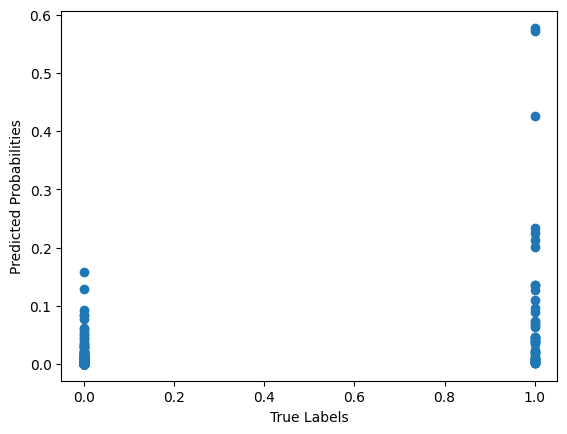

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the validation set
y_pred_logistic = best_result.predict(X_val)

# Create a scatter plot
plt.scatter(y_val, y_pred_logistic)
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.show()

#Lightgbm accuracy

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

# Load and split the data
df1 = df.iloc[:, 4:]  # Select all rows and columns starting from the 4th column
X_train, X_val, y_train, y_val = train_test_split(df1.drop('asample', axis=1), df1['asample'], test_size=0.2, random_state=42)

# Create a scorer object from the custom scoring function
scorer = make_scorer(custom_scoring_function, greater_is_better=True)  # Set greater_is_better to True for accuracy

# Define the parameter search space
param_space = {
    'n_estimators': (1, 1000),
    'num_leaves': (2, 1000),
    'learning_rate': (0.001, 0.3, 'log-uniform'),
    'min_data_in_leaf': (10, 10000),
    'feature_fraction': (1e-3, 1.0, 'log-uniform')
}

# Initialize the LightGBM classifier
lgbm = LGBMClassifier()

from sklearn.metrics import accuracy_score

# Perform Bayesian Search optimization using accuracy as the scoring metric
opt = BayesSearchCV(lgbm, param_space, n_iter=50, cv=5, n_jobs=-1, scoring='accuracy')
opt.fit(X_train, y_train)

# Get the best parameters from the optimization
best_params = opt.best_params_




[LightGBM] [Warning] feature_fraction is set=0.6662413680563893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6662413680563893
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


In [ ]:
# Train and evaluate models with 50 different seeds using the optimized parameters
np.random.seed(42)
prob_results = []
for i in range(50):
    # Set seed for reproducibility
    np.random.seed(i)
    # Initialize the LightGBM classifier with the best parameters from optimization
    model_acc = LGBMClassifier(**best_params, random_state=i)
    model_acc.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10)  # Enable early stopping
    # Predict on the validation set
    prob = model_acc.predict_proba(X_val)[:, 1]
    prob_results.append(prob)

# Use the average probability to get the new model's predictions
avg_prob = np.mean(prob_results, axis=0)
new_preds = (avg_prob > 0.5).astype(int)

# Evaluate the performance of the averaged model on the validation set
avg_model_score_acc = accuracy_score(y_val, new_preds)
avg_model_score_sco = custom_scoring_function(y_val, new_preds)



[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.435554
[3]	valid_0's binary_logloss: 0.428474
[4]	valid_0's binary_logloss: 0.425562
[5]	valid_0's binary_logloss: 0.419658
[6]	valid_0's binary_logloss: 0.414351
[7]	valid_0's binary_logloss: 0.412107
[8]	valid_0's binary_logloss: 0.409376
[9]	valid_0's binary_logloss: 0.405047
[10]	valid_0's binary_logloss: 0.401254
[11]	valid_0's binary_logloss: 0.399522
[12]	valid_0's binary_logloss: 0.395957
[13]	valid_0's binary_logloss: 0.394005
[14]	valid_0's binary_logloss: 0.390994
[15]	valid_0's binary_logloss: 0.387983
[16]	valid_0's binary_logloss: 0.38539
[17]	valid_0's binary_logloss: 0.384053
[18]	valid_0's binary_logloss: 0.381508
[19]	valid_0's binary_logloss: 0.38044
[20]	valid_0's binary_logloss: 0.377902
[21]	valid_0's binary_logloss: 0.375626
[22]	valid_0's binary_logloss: 0.374774
[23]	valid_0's binary_logloss: 0.374083
[24]	valid_0's binary_logloss: 0.372056
[25]	valid_0's binary_logloss: 0.369759
[26]	valid_

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[1]	valid_0's binary_logloss: 0.450911
[2]	valid_0's binary_logloss: 0.440911
[3]	valid_0's binary_logloss: 0.432614
[4]	valid_0's binary_logloss: 0.425634
[5]	valid_0's binary_logloss: 0.419701
[6]	valid_0's binary_logloss: 0.417443
[7]	valid_0's binary_logloss: 0.412441
[8]	valid_0's binary_logloss: 0.407906
[9]	valid_0's binary_logloss: 0.403683
[10]	valid_0's binary_logloss: 0.399904
[11]	valid_0's binary_logloss: 0.396551
[12]	valid_0's binary_logloss: 0.394865
[13]	valid_0's binary_logloss: 0.391565
[14]	valid_0's binary_logloss: 0.388713
[15]	valid_0's binary_logloss: 0.385896
[16]	valid_0's binary_logloss: 0.384563
[17]	valid_0's binary_logloss: 0.382052
[18]	valid_0's binary_logloss: 0.38097
[19]	valid_0's binary_logloss: 0.380083
[20]	valid_0's binary_logloss: 0.37855
[21]	valid_0's binary_logloss: 0.376428
[22]	valid_0's binary_logloss: 0.374721
[23]	val

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[120]	valid_0's binary_logloss: 0.301338
[121]	valid_0's binary_logloss: 0.300921
[122]	valid_0's binary_logloss: 0.300777
[123]	valid_0's binary_logloss: 0.3009
[124]	valid_0's binary_logloss: 0.300248
[125]	valid_0's binary_logloss: 0.299806
[126]	valid_0's binary_logloss: 0.299679
[127]	valid_0's binary_logloss: 0.299383
[128]	valid_0's binary_logloss: 0.299102
[129]	valid_0's binary_logloss: 0.299042
[130]	valid_0's binary_logloss: 0.299151
[131]	valid_0's binary_logloss: 0.298779
[132]	valid_0's binary_logloss: 0.298913
[133]	valid_0's binary_logloss: 0.298799
[134]	valid_0's binary_logloss: 0.298774
[135]	valid_0's binary_logloss: 0.298516
[136]	valid_0's binary_logloss: 0.29817
[137]	valid_0's binary_logloss: 0.298019
[138]	valid_0's binary_logloss: 0.297911
[139]	valid_0's binary_logloss: 0.297893
[140]	valid_0's binary_logloss: 0.297777
[141]	valid_0's binary_logloss: 0.29775
[142]	valid_0's binary_logloss: 0.297347
[143]	valid_0's binary_logloss: 0.296789
[144]	valid_0's bina

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6662413680563893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6662413680563893
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.435554
[3]	valid_0's binary_logloss: 0.428474
[4]	valid_0's binary_logloss: 0.425562
[5]	valid_0's binary_logloss: 0.419658
[6]	valid_0's binary_logloss: 0.41737
[7]	valid_0's binary_logloss: 0.415505
[8]	valid_0's binary_logloss: 0.410596
[9]	valid_0's binary_logloss: 0.406097
[10]	valid_0's binary_logloss: 0.401935
[11]	valid_0's binary_logloss: 0.398183
[12]	valid_0's binary_logloss: 0.394853
[13]	valid_0's binary_logloss: 0.391555
[14]	valid_0's binary_logloss: 0.38871
[15]	valid_0's binary_logloss: 0.385894
[16]	valid_0's binary_logloss: 0.383369
[17]	valid_0's binary_logloss: 0.382045
[18]	valid_0's binary_logloss: 0.379795
[19]	valid_0's 

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[23]	valid_0's binary_logloss: 0.375428
[24]	valid_0's binary_logloss: 0.373488
[25]	valid_0's binary_logloss: 0.371749
[26]	valid_0's binary_logloss: 0.369929
[27]	valid_0's binary_logloss: 0.368292
[28]	valid_0's binary_logloss: 0.366633
[29]	valid_0's binary_logloss: 0.365184
[30]	valid_0's binary_logloss: 0.363897
[31]	valid_0's binary_logloss: 0.362684
[32]	valid_0's binary_logloss: 0.361601
[33]	valid_0's binary_logloss: 0.360105
[34]	valid_0's binary_logloss: 0.359616
[35]	valid_0's binary_logloss: 0.35714
[36]	valid_0's binary_logloss: 0.354843
[37]	valid_0's binary_logloss: 0.35271
[38]	valid_0's binary_logloss: 0.351615
[39]	valid_0's binary_logloss: 0.349623
[40]	valid_0's binary_logloss: 0.348769
[41]	valid_0's binary_logloss: 0.3479
[42]	valid_0's binary_logloss: 0.34759
[43]	valid_0's binary_logloss: 0.345735
[44]	valid_0's binary_logloss: 0.344011
[45]	valid_0's binary_logloss: 0.342409
[46]	valid_0's binary_logloss: 0.341174
[47]	valid_0's binary_logloss: 0.340474
[48]

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	valid_0's binary_logloss: 0.376387
[21]	valid_0's binary_logloss: 0.37455
[22]	valid_0's binary_logloss: 0.373662
[23]	valid_0's binary_logloss: 0.37294
[24]	valid_0's binary_logloss: 0.370489
[25]	valid_0's binary_logloss: 0.368834
[26]	valid_0's binary_logloss: 0.367288
[27]	valid_0's binary_logloss: 0.365913
[28]	valid_0's binary_logloss: 0.363605
[29]	valid_0's binary_logloss: 0.363079
[30]	valid_0's binary_logloss: 0.360959
[31]	valid_0's binary_logloss: 0.359257
[32]	valid_0's binary_logloss: 0.358054
[33]	valid_0's binary_logloss: 0.357013
[34]	valid_0's binary_logloss: 0.355877
[35]	valid_0's binary_logloss: 0.354925
[36]	valid_0's binary_logloss: 0.352926
[37]	valid_0's binary_logloss: 0.3514
[38]	valid_0's binary_logloss: 0.350574
[39]	valid_0's binary_logloss: 0.348724
[40]	valid_0's binary_logloss: 0.348392
[41]	valid_0's binary_logloss: 0.347671
[42]	valid_0's binary_logloss: 0.34631
[43]	valid_0's binary_logloss: 0.344603
[44]	valid_0's binary_logloss: 0.343853
[45]	

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[135]	valid_0's binary_logloss: 0.297986
[136]	valid_0's binary_logloss: 0.297978
[137]	valid_0's binary_logloss: 0.297566
[138]	valid_0's binary_logloss: 0.29746
[139]	valid_0's binary_logloss: 0.297122
[140]	valid_0's binary_logloss: 0.297091
[141]	valid_0's binary_logloss: 0.296853
[142]	valid_0's binary_logloss: 0.296835
[143]	valid_0's binary_logloss: 0.296271
[144]	valid_0's binary_logloss: 0.296174
[145]	valid_0's binary_logloss: 0.296337
[146]	valid_0's binary_logloss: 0.296113
[147]	valid_0's binary_logloss: 0.295802
[148]	valid_0's binary_logloss: 0.295984
[149]	valid_0's binary_logloss: 0.295793
[150]	valid_0's binary_logloss: 0.295582
[151]	valid_0's binary_logloss: 0.295562
[152]	valid_0's binary_logloss: 0.295556
[153]	valid_0's binary_logloss: 0.295561
[154]	valid_0's binary_logloss: 0.295472
[155]	valid_0's binary_logloss: 0.295491
[156]	valid_0's binary_logloss: 0.29529
[157]	valid_0's binary_logloss: 0.295213
[158]	valid_0's binary_logloss: 0.294942
[159]	valid_0's bi

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[83]	valid_0's binary_logloss: 0.313365
[84]	valid_0's binary_logloss: 0.312598
[85]	valid_0's binary_logloss: 0.312514
[86]	valid_0's binary_logloss: 0.311856
[87]	valid_0's binary_logloss: 0.311882
[88]	valid_0's binary_logloss: 0.311322
[89]	valid_0's binary_logloss: 0.31081
[90]	valid_0's binary_logloss: 0.310516
[91]	valid_0's binary_logloss: 0.309895
[92]	valid_0's binary_logloss: 0.309652
[93]	valid_0's binary_logloss: 0.308974
[94]	valid_0's binary_logloss: 0.308931
[95]	valid_0's binary_logloss: 0.308448
[96]	valid_0's binary_logloss: 0.308502
[97]	valid_0's binary_logloss: 0.307873
[98]	valid_0's binary_logloss: 0.307419
[99]	valid_0's binary_logloss: 0.306971
[100]	valid_0's binary_logloss: 0.306417
[101]	valid_0's binary_logloss: 0.306439
[102]	valid_0's binary_logloss: 0.306265
[103]	valid_0's binary_logloss: 0.305693
[104]	valid_0's binary_logloss: 0.305287
[105]	valid_0's binary_logloss: 0.304473
[106]	valid_0's binary_logloss: 0.304553
[107]	valid_0's binary_logloss: 0.

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.448315
[2]	valid_0's binary_logloss: 0.445118
[3]	valid_0's binary_logloss: 0.442538
[4]	valid_0's binary_logloss: 0.433448
[5]	valid_0's binary_logloss: 0.425847
[6]	valid_0's binary_logloss: 0.419415
[7]	valid_0's binary_logloss: 0.413927
[8]	valid_0's binary_logloss: 0.409213
[9]	valid_0's binary_logloss: 0.404884
[10]	valid_0's binary_logloss: 0.400903
[11]	valid_0's binary_logloss: 0.399199
[12]	valid_0's binary_logloss: 0.397797
[13]	valid_0's binary_logloss: 0.394225
[14]	valid_0's binary_logloss: 0.391055
[15]	valid_0's binary_logloss: 0.389934
[16]	valid_0's binary_logloss: 0.386798
[17]	valid_0's binary_logloss: 0.385896
[18]	valid_0's binary_logloss: 0.383092
[19]	valid_0's binary_logloss: 0.380619
[20]	valid_0's binary_logloss: 0.378225
[21]	valid_0's binary_logloss: 0.376079
[22]	valid_0's binary_logloss: 0.375378
[23]	valid_0's binary_logloss: 0.373333
[24]	valid_0's binary_logloss: 0.3709
[25]	valid_0's binary_logloss: 0.369589
[26]	valid_

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[155]	valid_0's binary_logloss: 0.296262
[156]	valid_0's binary_logloss: 0.29599
[157]	valid_0's binary_logloss: 0.29579
[158]	valid_0's binary_logloss: 0.295593
[159]	valid_0's binary_logloss: 0.295514
[160]	valid_0's binary_logloss: 0.295128
[161]	valid_0's binary_logloss: 0.294762
[162]	valid_0's binary_logloss: 0.294582
[163]	valid_0's binary_logloss: 0.294414
[164]	valid_0's binary_logloss: 0.294353
[165]	valid_0's binary_logloss: 0.293866
[166]	valid_0's binary_logloss: 0.294039
[167]	valid_0's binary_logloss: 0.293796
[168]	valid_0's binary_logloss: 0.293622
[169]	valid_0's binary_logloss: 0.293643
[170]	valid_0's binary_logloss: 0.293834
[171]	valid_0's binary_logloss: 0.293856
[172]	valid_0's binary_logloss: 0.293801
[173]	valid_0's binary_logloss: 0.293915
[174]	valid_0's binary_logloss: 0.29395
[175]	valid_0's binary_logloss: 0.293728
[176]	valid_0's binary_logloss: 0.29345
[177]	valid_0's binary_logloss: 0.2931
[178]	valid_0's binary_logloss: 0.292859
[179]	valid_0's binary

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[178]	valid_0's binary_logloss: 0.293787
[179]	valid_0's binary_logloss: 0.293637
[180]	valid_0's binary_logloss: 0.293365
[181]	valid_0's binary_logloss: 0.29301
[182]	valid_0's binary_logloss: 0.293044
[183]	valid_0's binary_logloss: 0.293069
[184]	valid_0's binary_logloss: 0.293187
[185]	valid_0's binary_logloss: 0.292754
[186]	valid_0's binary_logloss: 0.292708
[187]	valid_0's binary_logloss: 0.292447
[188]	valid_0's binary_logloss: 0.292222
[189]	valid_0's binary_logloss: 0.292425
[190]	valid_0's binary_logloss: 0.292237
[191]	valid_0's binary_logloss: 0.292429
[192]	valid_0's binary_logloss: 0.292624
[193]	valid_0's binary_logloss: 0.292973
[194]	valid_0's binary_logloss: 0.292898
[195]	valid_0's binary_logloss: 0.292575
[196]	valid_0's binary_logloss: 0.292447
[197]	valid_0's binary_logloss: 0.292499
[198]	valid_0's binary_logloss: 0.292547
[LightGBM] [Warning] feature_fraction is set=0.6662413680563893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.666

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[118]	valid_0's binary_logloss: 0.302283
[119]	valid_0's binary_logloss: 0.30223
[120]	valid_0's binary_logloss: 0.302091
[121]	valid_0's binary_logloss: 0.302008
[122]	valid_0's binary_logloss: 0.301591
[123]	valid_0's binary_logloss: 0.301286
[124]	valid_0's binary_logloss: 0.301164
[125]	valid_0's binary_logloss: 0.301118
[126]	valid_0's binary_logloss: 0.300978
[127]	valid_0's binary_logloss: 0.300527
[128]	valid_0's binary_logloss: 0.300247
[129]	valid_0's binary_logloss: 0.299969
[130]	valid_0's binary_logloss: 0.299591
[131]	valid_0's binary_logloss: 0.29954
[132]	valid_0's binary_logloss: 0.29943
[133]	valid_0's binary_logloss: 0.299562
[134]	valid_0's binary_logloss: 0.299213
[135]	valid_0's binary_logloss: 0.299065
[136]	valid_0's binary_logloss: 0.298813
[137]	valid_0's binary_logloss: 0.298714
[138]	valid_0's binary_logloss: 0.298112
[139]	valid_0's binary_logloss: 0.2977
[140]	valid_0's binary_logloss: 0.297855
[141]	valid_0's binary_logloss: 0.297768
[142]	valid_0's binar

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[15]	valid_0's binary_logloss: 0.38807
[16]	valid_0's binary_logloss: 0.385277
[17]	valid_0's binary_logloss: 0.382806
[18]	valid_0's binary_logloss: 0.380422
[19]	valid_0's binary_logloss: 0.378284
[20]	valid_0's binary_logloss: 0.377197
[21]	valid_0's binary_logloss: 0.375499
[22]	valid_0's binary_logloss: 0.37365
[23]	valid_0's binary_logloss: 0.372793
[24]	valid_0's binary_logloss: 0.371013
[25]	valid_0's binary_logloss: 0.370323
[26]	valid_0's binary_logloss: 0.369768
[27]	valid_0's binary_logloss: 0.368187
[28]	valid_0's binary_logloss: 0.365742
[29]	valid_0's binary_logloss: 0.363474
[30]	valid_0's binary_logloss: 0.36193
[31]	valid_0's binary_logloss: 0.360642
[32]	valid_0's binary_logloss: 0.359407
[33]	valid_0's binary_logloss: 0.358324
[34]	valid_0's binary_logloss: 0.356762
[35]	valid_0's binary_logloss: 0.355895
[36]	valid_0's binary_logloss: 0.355002
[37]	valid_0's binary_logloss: 0.352848
[38]	valid_0's binary_logloss: 0.350848
[39]	valid_0's binary_logloss: 0.348992
[4

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[47]	valid_0's binary_logloss: 0.341333
[48]	valid_0's binary_logloss: 0.340098
[49]	valid_0's binary_logloss: 0.338601
[50]	valid_0's binary_logloss: 0.337481
[51]	valid_0's binary_logloss: 0.336216
[52]	valid_0's binary_logloss: 0.335042
[53]	valid_0's binary_logloss: 0.334223
[54]	valid_0's binary_logloss: 0.33356
[55]	valid_0's binary_logloss: 0.333403
[56]	valid_0's binary_logloss: 0.332079
[57]	valid_0's binary_logloss: 0.331007
[58]	valid_0's binary_logloss: 0.330018
[59]	valid_0's binary_logloss: 0.328789
[60]	valid_0's binary_logloss: 0.3284
[61]	valid_0's binary_logloss: 0.327436
[62]	valid_0's binary_logloss: 0.326542
[63]	valid_0's binary_logloss: 0.326469
[64]	valid_0's binary_logloss: 0.32533
[65]	valid_0's binary_logloss: 0.325031
[66]	valid_0's binary_logloss: 0.324162
[67]	valid_0's binary_logloss: 0.323332
[68]	valid_0's binary_logloss: 0.322856
[69]	valid_0's binary_logloss: 0.322062
[70]	valid_0's binary_logloss: 0.321277
[71]	valid_0's binary_logloss: 0.32023
[72]

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[168]	valid_0's binary_logloss: 0.292374
[169]	valid_0's binary_logloss: 0.292374
[170]	valid_0's binary_logloss: 0.292199
[171]	valid_0's binary_logloss: 0.292251
[172]	valid_0's binary_logloss: 0.292449
[173]	valid_0's binary_logloss: 0.292207
[174]	valid_0's binary_logloss: 0.292045
[175]	valid_0's binary_logloss: 0.291977
[176]	valid_0's binary_logloss: 0.292011
[177]	valid_0's binary_logloss: 0.291875
[178]	valid_0's binary_logloss: 0.291987
[179]	valid_0's binary_logloss: 0.292173
[180]	valid_0's binary_logloss: 0.291933
[181]	valid_0's binary_logloss: 0.291582
[182]	valid_0's binary_logloss: 0.291606
[183]	valid_0's binary_logloss: 0.291337
[184]	valid_0's binary_logloss: 0.291117
[185]	valid_0's binary_logloss: 0.291233
[186]	valid_0's binary_logloss: 0.291152
[187]	valid_0's binary_logloss: 0.291099
[188]	valid_0's binary_logloss: 0.291146
[189]	valid_0's binary_logloss: 0.290892
[190]	valid_0's binary_logloss: 0.290472
[191]	valid_0's binary_logloss: 0.290682
[192]	valid_0's 

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[49]	valid_0's binary_logloss: 0.338344
[50]	valid_0's binary_logloss: 0.337244
[51]	valid_0's binary_logloss: 0.335783
[52]	valid_0's binary_logloss: 0.335206
[53]	valid_0's binary_logloss: 0.334097
[54]	valid_0's binary_logloss: 0.332724
[55]	valid_0's binary_logloss: 0.332085
[56]	valid_0's binary_logloss: 0.330796
[57]	valid_0's binary_logloss: 0.329821
[58]	valid_0's binary_logloss: 0.329359
[59]	valid_0's binary_logloss: 0.328684
[60]	valid_0's binary_logloss: 0.327707
[61]	valid_0's binary_logloss: 0.326823
[62]	valid_0's binary_logloss: 0.325683
[63]	valid_0's binary_logloss: 0.325309
[64]	valid_0's binary_logloss: 0.325238
[65]	valid_0's binary_logloss: 0.324925
[66]	valid_0's binary_logloss: 0.324073
[67]	valid_0's binary_logloss: 0.323624
[68]	valid_0's binary_logloss: 0.322543
[69]	valid_0's binary_logloss: 0.321755
[70]	valid_0's binary_logloss: 0.320755
[71]	valid_0's binary_logloss: 0.319978
[72]	valid_0's binary_logloss: 0.319267
[73]	valid_0's binary_logloss: 0.31834


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[112]	valid_0's binary_logloss: 0.303602
[113]	valid_0's binary_logloss: 0.303104
[114]	valid_0's binary_logloss: 0.302761
[115]	valid_0's binary_logloss: 0.302866
[116]	valid_0's binary_logloss: 0.302963
[117]	valid_0's binary_logloss: 0.302511
[118]	valid_0's binary_logloss: 0.302048
[119]	valid_0's binary_logloss: 0.301962
[120]	valid_0's binary_logloss: 0.301649
[121]	valid_0's binary_logloss: 0.301517
[122]	valid_0's binary_logloss: 0.301465
[123]	valid_0's binary_logloss: 0.301584
[124]	valid_0's binary_logloss: 0.301175
[125]	valid_0's binary_logloss: 0.300881
[126]	valid_0's binary_logloss: 0.3006
[127]	valid_0's binary_logloss: 0.300224
[128]	valid_0's binary_logloss: 0.300096
[129]	valid_0's binary_logloss: 0.299957
[130]	valid_0's binary_logloss: 0.299916
[131]	valid_0's binary_logloss: 0.299646
[132]	valid_0's binary_logloss: 0.299532
[133]	valid_0's binary_logloss: 0.299484
[134]	valid_0's binary_logloss: 0.298877
[135]	valid_0's binary_logloss: 0.298529
[136]	valid_0's b

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.435554
[3]	valid_0's binary_logloss: 0.428474
[4]	valid_0's binary_logloss: 0.422463
[5]	valid_0's binary_logloss: 0.419635
[6]	valid_0's binary_logloss: 0.414336
[7]	valid_0's binary_logloss: 0.409922
[8]	valid_0's binary_logloss: 0.407727
[9]	valid_0's binary_logloss: 0.40593
[10]	valid_0's binary_logloss: 0.401713
[11]	valid_0's binary_logloss: 0.397973
[12]	valid_0's binary_logloss: 0.394652
[13]	valid_0's binary_logloss: 0.391362
[14]	valid_0's binary_logloss: 0.388562
[15]	valid_0's binary_logloss: 0.387186
[16]	valid_0's binary_logloss: 0.384395
[17]	valid_0's binary_logloss: 0.38189
[18]	valid_0's binary_logloss: 0.379645
[19]	valid_0's binary_logloss: 0.377838
[20]	valid_0's binary_logloss: 0.376764
[21]	valid_0's binary_logloss: 0.37487
[22]	valid_0's binary_logloss: 0.373178
[23]	valid_0's binary_logloss: 0.372314
[24]	valid_0's binary_logloss: 0.371611
[25]	valid_0's binary_logloss: 0.369966
[26]	valid_0

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[193]	valid_0's binary_logloss: 0.292127
[194]	valid_0's binary_logloss: 0.29233
[195]	valid_0's binary_logloss: 0.292528
[196]	valid_0's binary_logloss: 0.292386
[197]	valid_0's binary_logloss: 0.292581
[198]	valid_0's binary_logloss: 0.29263
[199]	valid_0's binary_logloss: 0.292674
[200]	valid_0's binary_logloss: 0.292712
[201]	valid_0's binary_logloss: 0.292673
[LightGBM] [Warning] feature_fraction is set=0.6662413680563893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6662413680563893
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.440861
[3]	valid_0's binary_logloss: 0.432581
[4]	valid_0's binary_logloss: 0.425614
[5]	valid_0's binary_logloss: 0.419691
[6]	valid_0's binary_logloss: 0.417421
[7]	valid_0's binary_logloss: 0.412429
[8]	valid_0's binary_logloss: 0.407897
[9]	valid_0's binary_logloss: 0.406129
[10]	v

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[12]	valid_0's binary_logloss: 0.395783
[13]	valid_0's binary_logloss: 0.394358
[14]	valid_0's binary_logloss: 0.393189
[15]	valid_0's binary_logloss: 0.391231
[16]	valid_0's binary_logloss: 0.38825
[17]	valid_0's binary_logloss: 0.387321
[18]	valid_0's binary_logloss: 0.384356
[19]	valid_0's binary_logloss: 0.381694
[20]	valid_0's binary_logloss: 0.379348
[21]	valid_0's binary_logloss: 0.377075
[22]	valid_0's binary_logloss: 0.375038
[23]	valid_0's binary_logloss: 0.373216
[24]	valid_0's binary_logloss: 0.371545
[25]	valid_0's binary_logloss: 0.369997
[26]	valid_0's binary_logloss: 0.368618
[27]	valid_0's binary_logloss: 0.367921
[28]	valid_0's binary_logloss: 0.365416
[29]	valid_0's binary_logloss: 0.364292
[30]	valid_0's binary_logloss: 0.361948
[31]	valid_0's binary_logloss: 0.360802
[32]	valid_0's binary_logloss: 0.35862
[33]	valid_0's binary_logloss: 0.358134
[34]	valid_0's binary_logloss: 0.35696
[35]	valid_0's binary_logloss: 0.355271
[36]	valid_0's binary_logloss: 0.354361
[37

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.450911
[2]	valid_0's binary_logloss: 0.445151
[3]	valid_0's binary_logloss: 0.435909
[4]	valid_0's binary_logloss: 0.428196
[5]	valid_0's binary_logloss: 0.421678
[6]	valid_0's binary_logloss: 0.416122
[7]	valid_0's binary_logloss: 0.413888
[8]	valid_0's binary_logloss: 0.412061
[9]	valid_0's binary_logloss: 0.409301
[10]	valid_0's binary_logloss: 0.407834
[11]	valid_0's binary_logloss: 0.405411
[12]	valid_0's binary_logloss: 0.403184
[13]	valid_0's binary_logloss: 0.402023
[14]	valid_0's binary_logloss: 0.400072
[15]	valid_0's binary_logloss: 0.398281
[16]	valid_0's binary_logloss: 0.39462
[17]	valid_0's binary_logloss: 0.391193
[18]	valid_0's binary_logloss: 0.387981
[19]	valid_0's binary_logloss: 0.385113
[20]	valid_0's binary_logloss: 0.382263
[21]	valid_0's binary_logloss: 0.379734
[22]	valid_0's binary_logloss: 0.377468
[23]	valid_0's binary_logloss: 0.375225
[24]	valid_0's binary_logloss: 0.373032
[25]	valid_0's binary_logloss: 0.371067
[26]	valid

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6662413680563893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6662413680563893
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.435554
[3]	valid_0's binary_logloss: 0.428474
[4]	valid_0's binary_logloss: 0.422463
[5]	valid_0's binary_logloss: 0.417079
[6]	valid_0's binary_logloss: 0.414306
[7]	valid_0's binary_logloss: 0.409899
[8]	valid_0's binary_logloss: 0.407698
[9]	valid_0's binary_logloss: 0.403458
[10]	valid_0's binary_logloss: 0.399698
[11]	valid_0's binary_logloss: 0.396362
[12]	valid_0's binary_logloss: 0.393051
[13]	valid_0's binary_logloss: 0.39023
[14]	valid_0's binary_logloss: 0.388545
[15]	valid_0's binary_logloss: 0.385741
[16]	valid_0's binary_logloss: 0.384371
[17]	valid_0's binary_logloss: 0.383243
[18]	valid_0's binary_logloss: 0.380757
[19]	valid_0's

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[5]	valid_0's binary_logloss: 0.423239
[6]	valid_0's binary_logloss: 0.417417
[7]	valid_0's binary_logloss: 0.412427
[8]	valid_0's binary_logloss: 0.409793
[9]	valid_0's binary_logloss: 0.40546
[10]	valid_0's binary_logloss: 0.401419
[11]	valid_0's binary_logloss: 0.397807
[12]	valid_0's binary_logloss: 0.394602
[13]	valid_0's binary_logloss: 0.391413
[14]	valid_0's binary_logloss: 0.389757
[15]	valid_0's binary_logloss: 0.387021
[16]	valid_0's binary_logloss: 0.385669
[17]	valid_0's binary_logloss: 0.384557
[18]	valid_0's binary_logloss: 0.381884
[19]	valid_0's binary_logloss: 0.380985
[20]	valid_0's binary_logloss: 0.378597
[21]	valid_0's binary_logloss: 0.376456
[22]	valid_0's binary_logloss: 0.374562
[23]	valid_0's binary_logloss: 0.372737
[24]	valid_0's binary_logloss: 0.372031
[25]	valid_0's binary_logloss: 0.370406
[26]	valid_0's binary_logloss: 0.368798
[27]	valid_0's binary_logloss: 0.367468
[28]	valid_0's binary_logloss: 0.364974
[29]	valid_0's binary_logloss: 0.362661
[30]	

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.435554
[3]	valid_0's binary_logloss: 0.428474
[4]	valid_0's binary_logloss: 0.425562
[5]	valid_0's binary_logloss: 0.419658
[6]	valid_0's binary_logloss: 0.414351
[7]	valid_0's binary_logloss: 0.40993
[8]	valid_0's binary_logloss: 0.405653
[9]	valid_0's binary_logloss: 0.40186
[10]	valid_0's binary_logloss: 0.398496
[11]	valid_0's binary_logloss: 0.396397
[12]	valid_0's binary_logloss: 0.394672
[13]	valid_0's binary_logloss: 0.391385
[14]	valid_0's binary_logloss: 0.38999
[15]	valid_0's binary_logloss: 0.388843
[16]	valid_0's binary_logloss: 0.385927
[17]	valid_0's binary_logloss: 0.385004
[18]	valid_0's binary_logloss: 0.382438
[19]	valid_0's binary_logloss: 0.379958
[20]	valid_0's binary_logloss: 0.377733
[21]	valid_0's binary_logloss: 0.377007
[22]	valid_0's binary_logloss: 0.37559
[23]	valid_0's binary_logloss: 0.373561
[24]	valid_0's binary_logloss: 0.371823
[25]	valid_0's binary_logloss: 0.369356
[26]	valid_0'

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6662413680563893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6662413680563893
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.435554
[3]	valid_0's binary_logloss: 0.428474
[4]	valid_0's binary_logloss: 0.422463
[5]	valid_0's binary_logloss: 0.417079
[6]	valid_0's binary_logloss: 0.414306
[7]	valid_0's binary_logloss: 0.409899
[8]	valid_0's binary_logloss: 0.405627
[9]	valid_0's binary_logloss: 0.40346
[10]	valid_0's binary_logloss: 0.401683
[11]	valid_0's binary_logloss: 0.400225
[12]	valid_0's binary_logloss: 0.396508
[13]	valid_0's binary_logloss: 0.393209
[14]	valid_0's binary_logloss: 0.389942
[15]	valid_0's binary_logloss: 0.38701
[16]	valid_0's binary_logloss: 0.384422
[17]	valid_0's binary_logloss: 0.381919
[18]	valid_0's binary_logloss: 0.379674
[19]	valid_0's 

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.371703
[25]	valid_0's binary_logloss: 0.369896
[26]	valid_0's binary_logloss: 0.367605
[27]	valid_0's binary_logloss: 0.365994
[28]	valid_0's binary_logloss: 0.36551
[29]	valid_0's binary_logloss: 0.364004
[30]	valid_0's binary_logloss: 0.362641
[31]	valid_0's binary_logloss: 0.361285
[32]	valid_0's binary_logloss: 0.360176
[33]	valid_0's binary_logloss: 0.358472
[34]	valid_0's binary_logloss: 0.356333
[35]	valid_0's binary_logloss: 0.355366
[36]	valid_0's binary_logloss: 0.353826
[37]	valid_0's binary_logloss: 0.352848
[38]	valid_0's binary_logloss: 0.350851
[39]	valid_0's binary_logloss: 0.348996
[40]	valid_0's binary_logloss: 0.347618
[41]	valid_0's binary_logloss: 0.345906
[42]	valid_0's binary_logloss: 0.345094
[43]	valid_0's binary_logloss: 0.344354
[44]	valid_0's binary_logloss: 0.344085
[45]	valid_0's binary_logloss: 0.342744
[46]	valid_0's binary_logloss: 0.341146
[47]	valid_0's binary_logloss: 0.339926
[48]	valid_0's binary_logloss: 0.33881
[4

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.435554
[3]	valid_0's binary_logloss: 0.428474
[4]	valid_0's binary_logloss: 0.422463
[5]	valid_0's binary_logloss: 0.417079
[6]	valid_0's binary_logloss: 0.412589
[7]	valid_0's binary_logloss: 0.408281
[8]	valid_0's binary_logloss: 0.405616
[9]	valid_0's binary_logloss: 0.401833
[10]	valid_0's binary_logloss: 0.399687
[11]	valid_0's binary_logloss: 0.396357
[12]	valid_0's binary_logloss: 0.394617
[13]	valid_0's binary_logloss: 0.393187
[14]	valid_0's binary_logloss: 0.392013
[15]	valid_0's binary_logloss: 0.390031
[16]	valid_0's binary_logloss: 0.386923
[17]	valid_0's binary_logloss: 0.384134
[18]	valid_0's binary_logloss: 0.381676
[19]	valid_0's binary_logloss: 0.379295
[20]	valid_0's binary_logloss: 0.377161
[21]	valid_0's binary_logloss: 0.376266
[22]	valid_0's binary_logloss: 0.374216
[23]	valid_0's binary_logloss: 0.372463
[24]	valid_0's binary_logloss: 0.370869
[25]	valid_0's binary_logloss: 0.369381
[26]	vali

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6662413680563893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6662413680563893
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.440861
[3]	valid_0's binary_logloss: 0.432581
[4]	valid_0's binary_logloss: 0.425614
[5]	valid_0's binary_logloss: 0.423273
[6]	valid_0's binary_logloss: 0.417441
[7]	valid_0's binary_logloss: 0.412443
[8]	valid_0's binary_logloss: 0.407909
[9]	valid_0's binary_logloss: 0.406146
[10]	valid_0's binary_logloss: 0.40197
[11]	valid_0's binary_logloss: 0.400549
[12]	valid_0's binary_logloss: 0.39681
[13]	valid_0's binary_logloss: 0.395664
[14]	valid_0's binary_logloss: 0.392358
[15]	valid_0's binary_logloss: 0.389091
[16]	valid_0's binary_logloss: 0.388184
[17]	valid_0's binary_logloss: 0.386323
[18]	valid_0's binary_logloss: 0.383526
[19]	valid_0's 

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.435554
[3]	valid_0's binary_logloss: 0.43112
[4]	valid_0's binary_logloss: 0.424537
[5]	valid_0's binary_logloss: 0.41893
[6]	valid_0's binary_logloss: 0.416136
[7]	valid_0's binary_logloss: 0.413863
[8]	valid_0's binary_logloss: 0.412005
[9]	valid_0's binary_logloss: 0.410483
[10]	valid_0's binary_logloss: 0.407825
[11]	valid_0's binary_logloss: 0.405334
[12]	valid_0's binary_logloss: 0.401201
[13]	valid_0's binary_logloss: 0.397306
[14]	valid_0's binary_logloss: 0.393848
[15]	valid_0's binary_logloss: 0.392713
[16]	valid_0's binary_logloss: 0.389432
[17]	valid_0's binary_logloss: 0.38655
[18]	valid_0's binary_logloss: 0.383664
[19]	valid_0's binary_logloss: 0.382769
[20]	valid_0's binary_logloss: 0.380188
[21]	valid_0's binary_logloss: 0.37947
[22]	valid_0's binary_logloss: 0.377191
[23]	valid_0's binary_logloss: 0.374994
[24]	valid_0's binary_logloss: 0.373026
[25]	valid_0's binary_logloss: 0.370563
[26]	valid_0

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[112]	valid_0's binary_logloss: 0.303645
[113]	valid_0's binary_logloss: 0.303183
[114]	valid_0's binary_logloss: 0.302836
[115]	valid_0's binary_logloss: 0.302351
[116]	valid_0's binary_logloss: 0.302448
[117]	valid_0's binary_logloss: 0.302131
[118]	valid_0's binary_logloss: 0.302238
[119]	valid_0's binary_logloss: 0.302079
[120]	valid_0's binary_logloss: 0.301661
[121]	valid_0's binary_logloss: 0.301579
[122]	valid_0's binary_logloss: 0.301444
[123]	valid_0's binary_logloss: 0.301135
[124]	valid_0's binary_logloss: 0.300682
[125]	valid_0's binary_logloss: 0.300647
[126]	valid_0's binary_logloss: 0.30052
[127]	valid_0's binary_logloss: 0.300241
[128]	valid_0's binary_logloss: 0.300366
[129]	valid_0's binary_logloss: 0.300324
[130]	valid_0's binary_logloss: 0.300273
[131]	valid_0's binary_logloss: 0.299893
[132]	valid_0's binary_logloss: 0.299788
[133]	valid_0's binary_logloss: 0.299513
[134]	valid_0's binary_logloss: 0.298904
[135]	valid_0's binary_logloss: 0.298483
[136]	valid_0's b

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.435554
[3]	valid_0's binary_logloss: 0.428474
[4]	valid_0's binary_logloss: 0.422463
[5]	valid_0's binary_logloss: 0.419635
[6]	valid_0's binary_logloss: 0.417341
[7]	valid_0's binary_logloss: 0.41547
[8]	valid_0's binary_logloss: 0.410569
[9]	valid_0's binary_logloss: 0.409086
[10]	valid_0's binary_logloss: 0.406421
[11]	valid_0's binary_logloss: 0.402165
[12]	valid_0's binary_logloss: 0.398222
[13]	valid_0's binary_logloss: 0.394667
[14]	valid_0's binary_logloss: 0.39151
[15]	valid_0's binary_logloss: 0.388373
[16]	valid_0's binary_logloss: 0.387271
[17]	valid_0's binary_logloss: 0.386371
[18]	valid_0's binary_logloss: 0.383692
[19]	valid_0's binary_logloss: 0.381034
[20]	valid_0's binary_logloss: 0.380321
[21]	valid_0's binary_logloss: 0.377943
[22]	valid_0's binary_logloss: 0.375812
[23]	valid_0's binary_logloss: 0.37392
[24]	valid_0's binary_logloss: 0.372103
[25]	valid_0's binary_logloss: 0.369629
[26]	valid_0

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	valid_0's binary_logloss: 0.432545
[4]	valid_0's binary_logloss: 0.42559
[5]	valid_0's binary_logloss: 0.419676
[6]	valid_0's binary_logloss: 0.414362
[7]	valid_0's binary_logloss: 0.409935
[8]	valid_0's binary_logloss: 0.405654
[9]	valid_0's binary_logloss: 0.403507
[10]	valid_0's binary_logloss: 0.39974
[11]	valid_0's binary_logloss: 0.396398
[12]	valid_0's binary_logloss: 0.394684
[13]	valid_0's binary_logloss: 0.391393
[14]	valid_0's binary_logloss: 0.390006
[15]	valid_0's binary_logloss: 0.388867
[16]	valid_0's binary_logloss: 0.385947
[17]	valid_0's binary_logloss: 0.383362
[18]	valid_0's binary_logloss: 0.382452
[19]	valid_0's binary_logloss: 0.380799
[20]	valid_0's binary_logloss: 0.378423
[21]	valid_0's binary_logloss: 0.377699
[22]	valid_0's binary_logloss: 0.375259
[23]	valid_0's binary_logloss: 0.373142
[24]	valid_0's binary_logloss: 0.371095
[25]	valid_0's binary_logloss: 0.369349
[26]	valid_0's binary_logloss: 0.367741
[27]	valid_0's binary_logloss: 0.365436
[28]	vali

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.435554
[3]	valid_0's binary_logloss: 0.428474
[4]	valid_0's binary_logloss: 0.425562
[5]	valid_0's binary_logloss: 0.419658
[6]	valid_0's binary_logloss: 0.41737
[7]	valid_0's binary_logloss: 0.412394
[8]	valid_0's binary_logloss: 0.407869
[9]	valid_0's binary_logloss: 0.403666
[10]	valid_0's binary_logloss: 0.399896
[11]	valid_0's binary_logloss: 0.397677
[12]	valid_0's binary_logloss: 0.395973
[13]	valid_0's binary_logloss: 0.392816
[14]	valid_0's binary_logloss: 0.389673
[15]	valid_0's binary_logloss: 0.386959
[16]	valid_0's binary_logloss: 0.385608
[17]	valid_0's binary_logloss: 0.38294
[18]	valid_0's binary_logloss: 0.380547
[19]	valid_0's binary_logloss: 0.379464
[20]	valid_0's binary_logloss: 0.377329
[21]	valid_0's binary_logloss: 0.376452
[22]	valid_0's binary_logloss: 0.374573
[23]	valid_0's binary_logloss: 0.37276
[24]	valid_0's binary_logloss: 0.371141
[25]	valid_0's binary_logloss: 0.369543
[26]	valid_0

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[52]	valid_0's binary_logloss: 0.334453
[53]	valid_0's binary_logloss: 0.333361
[54]	valid_0's binary_logloss: 0.332266
[55]	valid_0's binary_logloss: 0.33211
[56]	valid_0's binary_logloss: 0.331372
[57]	valid_0's binary_logloss: 0.330392
[58]	valid_0's binary_logloss: 0.329939
[59]	valid_0's binary_logloss: 0.328955
[60]	valid_0's binary_logloss: 0.327725
[61]	valid_0's binary_logloss: 0.326582
[62]	valid_0's binary_logloss: 0.325664
[63]	valid_0's binary_logloss: 0.324786
[64]	valid_0's binary_logloss: 0.324274
[65]	valid_0's binary_logloss: 0.324202
[66]	valid_0's binary_logloss: 0.323888
[67]	valid_0's binary_logloss: 0.323094
[68]	valid_0's binary_logloss: 0.322831
[69]	valid_0's binary_logloss: 0.322051
[70]	valid_0's binary_logloss: 0.321226
[71]	valid_0's binary_logloss: 0.32018
[72]	valid_0's binary_logloss: 0.319468
[73]	valid_0's binary_logloss: 0.318501
[74]	valid_0's binary_logloss: 0.317777
[75]	valid_0's binary_logloss: 0.317767
[76]	valid_0's binary_logloss: 0.317588
[7

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[1]	valid_0's binary_logloss: 0.443981
[2]	valid_0's binary_logloss: 0.440861
[3]	valid_0's binary_logloss: 0.432581
[4]	valid_0's binary_logloss: 0.428209
[5]	valid_0's binary_logloss: 0.421727
[6]	valid_0's binary_logloss: 0.419416
[7]	valid_0's binary_logloss: 0.413973
[8]	valid_0's binary_logloss: 0.409299
[9]	valid_0's binary_logloss: 0.407519
[10]	valid_0's binary_logloss: 0.406061
[11]	valid_0's binary_logloss: 0.401781
[12]	valid_0's binary_logloss: 0.39939
[13]	valid_0's binary_logloss: 0.398241
[14]	valid_0's binary_logloss: 0.394644
[15]	valid_0's binary_logloss: 0.392681
[16]	valid_0's binary_logloss: 0.389406
[17]	valid_0's binary_logloss: 0.388509
[18]	valid_0's binary_logloss: 0.385652
[19]	valid_0's binary_logloss: 0.38279
[20]	valid_0's binary_logloss: 0.38208
[21]	valid_0's binary_logloss: 0.379519
[22]	valid_0's binary_logloss: 0.377241
[23]	vali

In [ ]:
# Print the scores for each seed and the averaged score
print("Scores per seed: ", [accuracy_score(y_val, (prob > 0.5).astype(int)) for prob in prob_results])
print("Averaged score accuracy: ", avg_model_score_acc)
print("Averaged score: ", avg_model_score_sco)

Scores per seed:  [0.1348314606741573, 0.1348314606741573, 0.13108614232209737, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.13108614232209737, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.13108614232209737, 0.1348314606741573, 0.13108614232209737, 0.13108614232209737, 0.1348314606741573, 0.1348314606741573, 0.12359550561797752, 0.1348314606741573, 0.13108614232209737, 0.13108614232209737, 0.1348314606741573, 0.1348314606741573, 0.13108614232209737, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.12734082397003746, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.1348314606741573, 0.13108614232209737, 0.13108614232209737, 0.13108614232209737, 0.1348314606741573, 0.1348314606741573, 0.13108614232209737, 0.12359550561797752, 0.1348314606741573, 0.1348314606741573, 0.1348

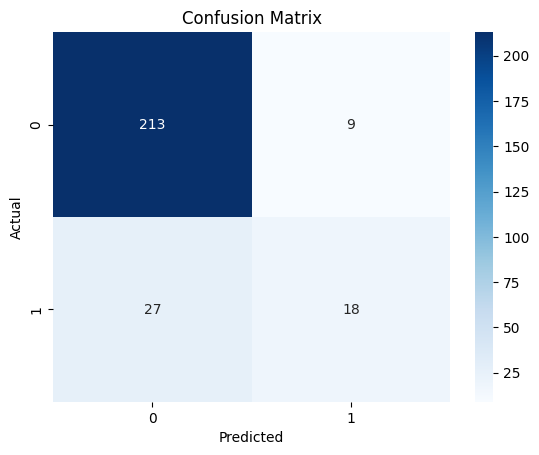

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for averaged model predictions
cm = confusion_matrix(y_val, new_preds)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


In [ ]:
# Check if all seed models are predicting the same
same_predictions = all(np.array_equal(new_preds, (np.array(prob) > 0.5).astype(int)) for prob in prob_results)

if same_predictions:
    print("All seed models are predicting the same.")
else:
    print("Seed models are predicting differently.")

Seed models are predicting differently.


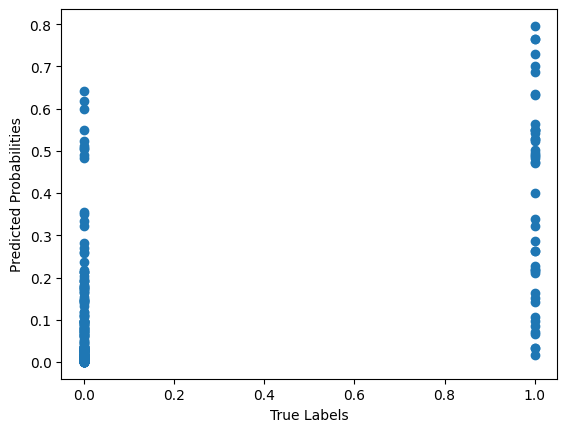

In [ ]:
# Make predictions on the validation set using the LightGBM model
y_pred_lgbm = model_acc.predict_proba(X_val)[:, 1]

# Create a scatter plot
plt.scatter(y_val, y_pred_lgbm)
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.show()

#Lightgbm


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

# Load and split the data
df1 = df.iloc[:, 4:]  # Select all rows and columns starting from the 4th column
X_train, X_val, y_train, y_val = train_test_split(df1.drop('asample', axis=1), df1['asample'], test_size=0.2, random_state=42)



# Create a scorer object from the custom scoring function
scorer = make_scorer(custom_scoring_function, greater_is_better=True)  # Set greater_is_better to False

# Define the parameter search space
param_space = {
    'n_estimators': (1, 1000),
    'num_leaves': (2, 1000),
    'learning_rate': (0.001, 0.3, 'log-uniform'),
    'min_data_in_leaf': (10, 10000),
    'feature_fraction': (1e-3, 1.0, 'log-uniform')
}

# Initialize the LightGBM classifier
lgbm = LGBMClassifier()

# Perform Bayesian Search optimization
opt = BayesSearchCV(lgbm, param_space, n_iter=50, cv=5, n_jobs=-1, scoring=scorer, refit=False, random_state=42)
opt.fit(X_train, y_train)

# Get the best parameters from the optimization
best_params = opt.best_params_








In [ ]:
from lightgbm import early_stopping
# Train and evaluate models with 50 different seeds using the optimized parameters
prob_results = []
for i in range(50):
    # Initialize the LightGBM classifier with the best parameters from optimization and a different random seed for each iteration
    model = LGBMClassifier(**best_params, random_state=i)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[early_stopping(10)])  # Use early_stopping callback
    # Predict probabilities on the validation set
    probs = model.predict_proba(X_val)[:, 1]  # Use class 1 probabilities
    prob_results.append(probs)
# Use the average probability to get the new model's predictions
avg_prob = np.mean(prob_results, axis=0)


# Evaluate the performance of the averaged model on the validation set
avg_model_preds = (avg_prob > 0.5).astype(int)
avg_model_score = custom_scoring_function(y_val, avg_model_preds)

# Print the scores for each seed and the averaged score
print("Scores per seed: ", [custom_scoring_function(y_val, (np.array(prob) > 0.5).astype(int)) for prob in prob_results])
print("Averaged score: ", avg_model_score)

[LightGBM] [Warning] feature_fraction is set=0.1221701822015101, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1221701822015101
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.33931
[LightGBM] [Warning] feature_fraction is set=0.1221701822015101, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1221701822015101
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[92]	valid_0's binary_logloss: 0.313642
[LightGBM] [Warning] feature_fraction is set=0.1221701822015101, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1221701822015101
[LightGBM] [Warning] mi

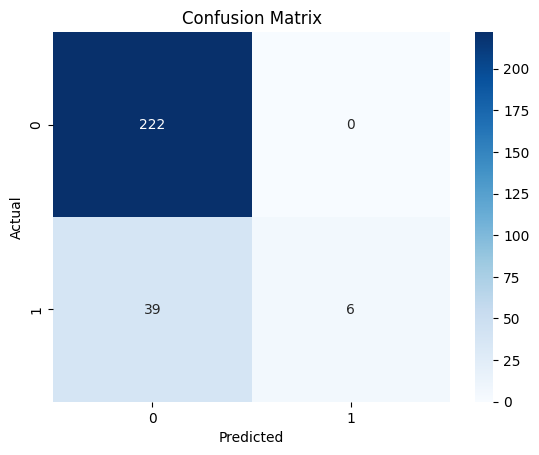

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for averaged model predictions
cm = confusion_matrix(y_val, avg_model_preds)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


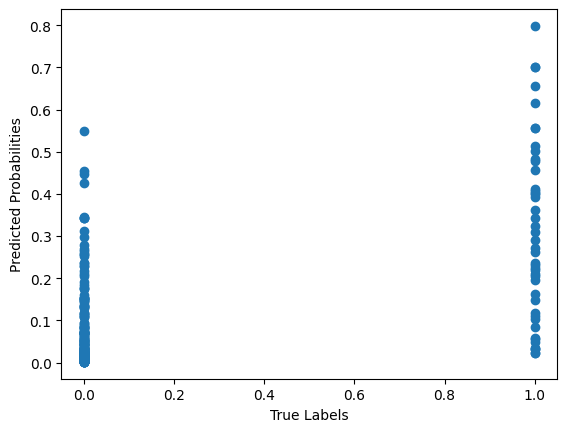

In [ ]:

# Make predictions on the validation set using the LightGBM model
y_pred_lgbm = model.predict_proba(X_val)[:, 1]

# Create a scatter plot
plt.scatter(y_val, y_pred_lgbm)
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.show()

In [ ]:
# Check if all seed models are predicting the same
same_predictions = all(np.array_equal(avg_model_preds, (np.array(prob) > 0.5).astype(int)) for prob in prob_results)

if same_predictions:
    print("All seed models are predicting the same.")
else:
    print("Seed models are predicting differently.")

Seed models are predicting differently.


In [ ]:
feature_names = X_train.columns.tolist()
feature_importances = dict(zip(feature_names, model.feature_importances_))
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))

In [ ]:
sorted_feature_importances

{'Zn': 726,
 'V40': 651,
 'Ca': 640,
 'P': 572,
 'ST': 517,
 'Na': 499,
 'oilhours': 458,
 'OXI': 358,
 'Cu': 353,
 'K': 348,
 'Fe': 288,
 'B': 244,
 'SUL': 206,
 'NIT': 201,
 'Al': 163,
 'Mo': 160,
 'Si': 145,
 'Pb': 129,
 'prev': 113,
 'oilchangelast': 88,
 'PQI': 48,
 'prevc': 46,
 'prevb': 37,
 'preva': 28,
 'prevx': 3}